## About Dataset
### Context
Machine Learning with python by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

### Content
#### Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

### Acknowledgements
The dataset is available on Keggle [here](https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv)

## Introduction

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data

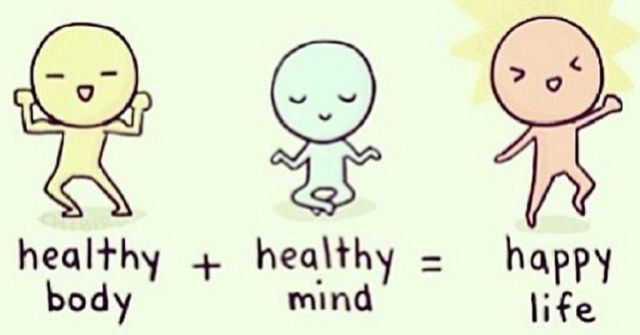

### Section 1.1 Import and Inspect the Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

# Ensemble and base models
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.ensemble import BaggingClassifier as Bagging
from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

#### 1.2 Load the dataset and display the first 10 rows.

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
df = pd.read_csv("insurance.csv")

# Show the first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

A good day is when there is no "NaN"in the data :D Let's look at our data to understand something about it. Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.

#### 1.3 Check for missing values and display summary statistics.


In [6]:
# Check data types and missing values
print("Data Info:")
df.info()

# Summary statistics
print("Summary Statistics:")
df.describe()
print(df.describe())

# Check for missing values in each column
print("Missing values:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Reflection 1:
 What do you notice about the dataset? 
 Are there any data issues?

The dataset has 1,338 entries and 7 well-structured columns with no missing values. Numerical features like age, BMI, and charges vary widely—especially charges, which may include high-cost outliers. Categorical features (sex, smoker, region) will need encoding before modeling. Overall, it’s a solid base for analysis.

### Section 2. Data Exploration and Preparation


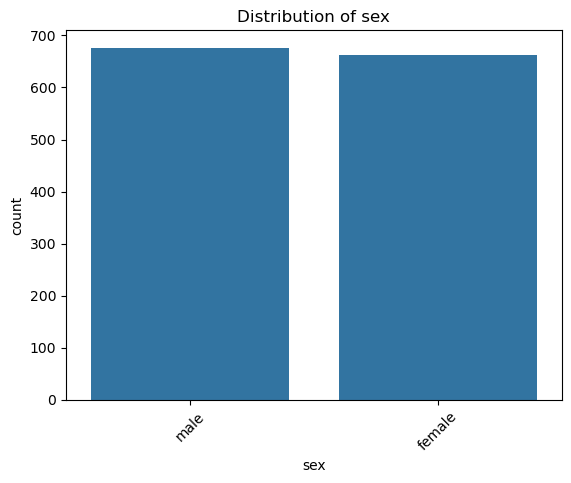

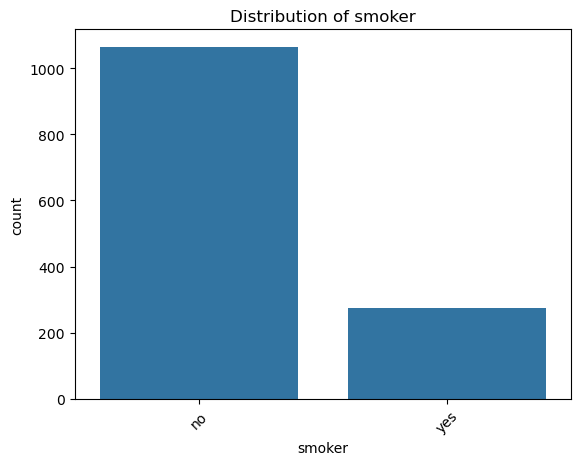

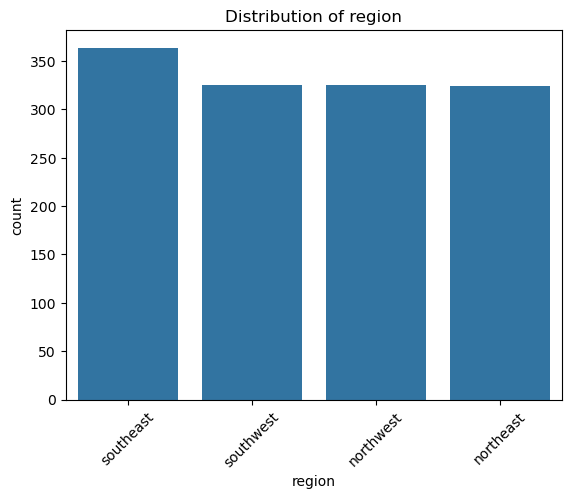

In [7]:
cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) == 0:
    print("No categorical columns found in this dataset.")
else:
    for col in cat_cols:
        if df[col].nunique() < 20:
            plt.figure()
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
            plt.xticks(rotation=45)
            plt.title(f'Distribution of {col}')
            plt.show()

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

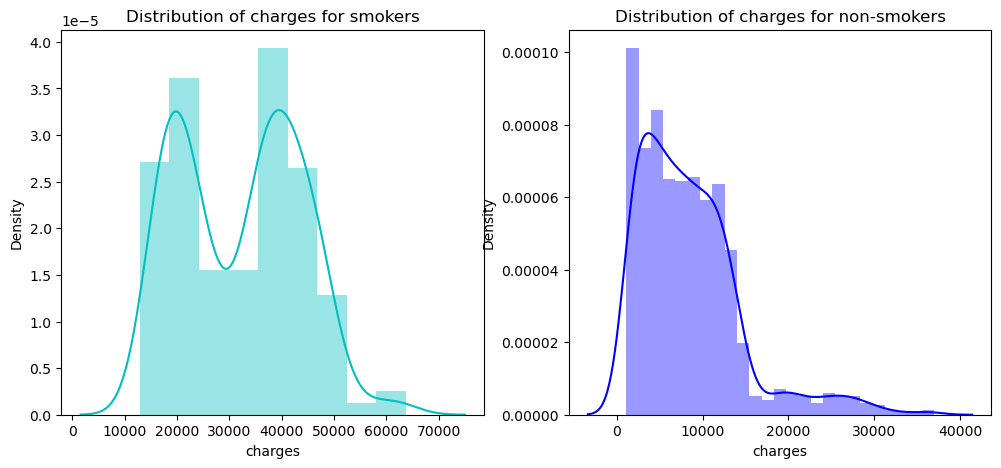

In [8]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [9]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
import numpy as np

output_notebook()

# Updated: Use `width` and `height` instead of `plot_width`, `plot_height`
p = figure(title="Distribution of charges",
           tools="save",
           background_fill_color="#E8DDCB",
           width=400, height=400, toolbar_location=None)

# Make histogram
hist, edges = np.histogram(data.charges)

# Plot histogram
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")

# Axis labels
p.xaxis.axis_label = 'Charges'
p.yaxis.axis_label = 'Frequency'

# Display using gridplot
show(gridplot([p], ncols=2))


Loading BokehJS ...

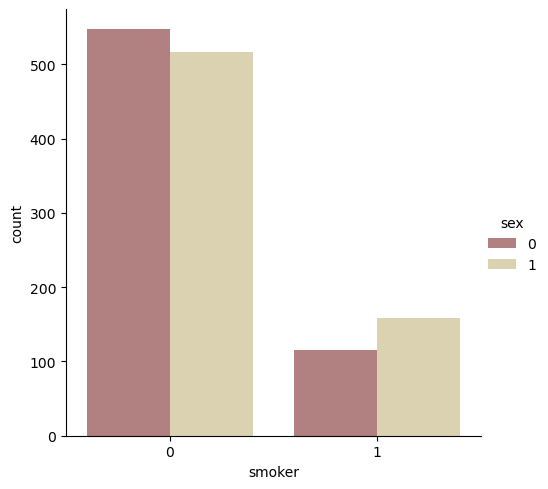

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

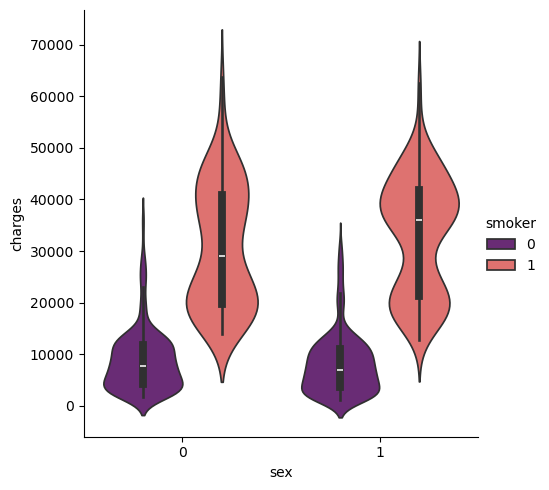

In [11]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

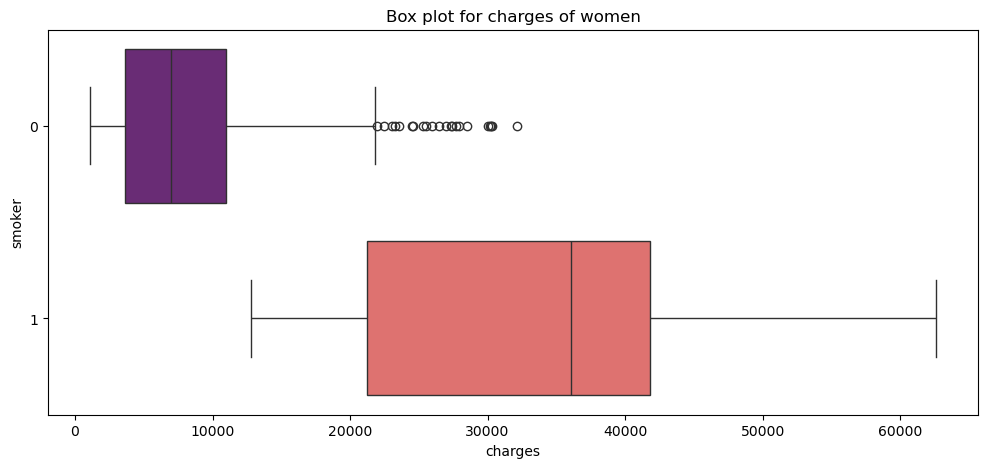

In [12]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

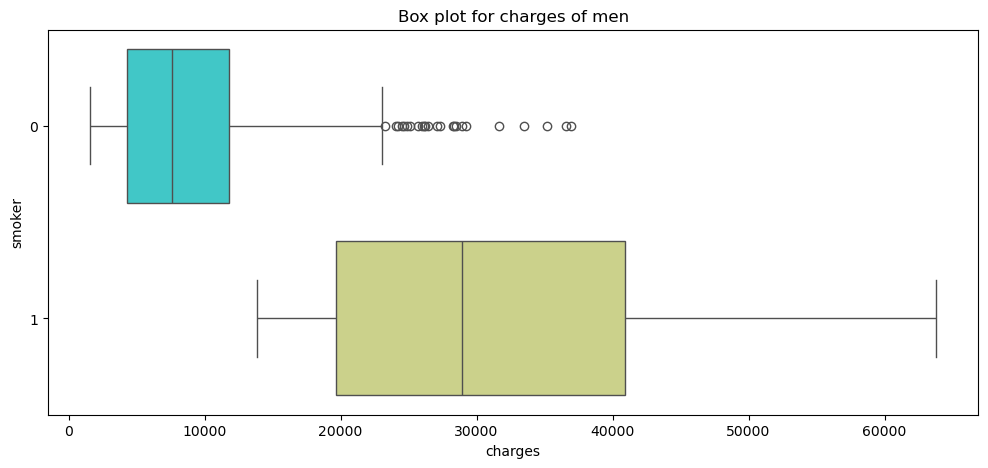

In [13]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

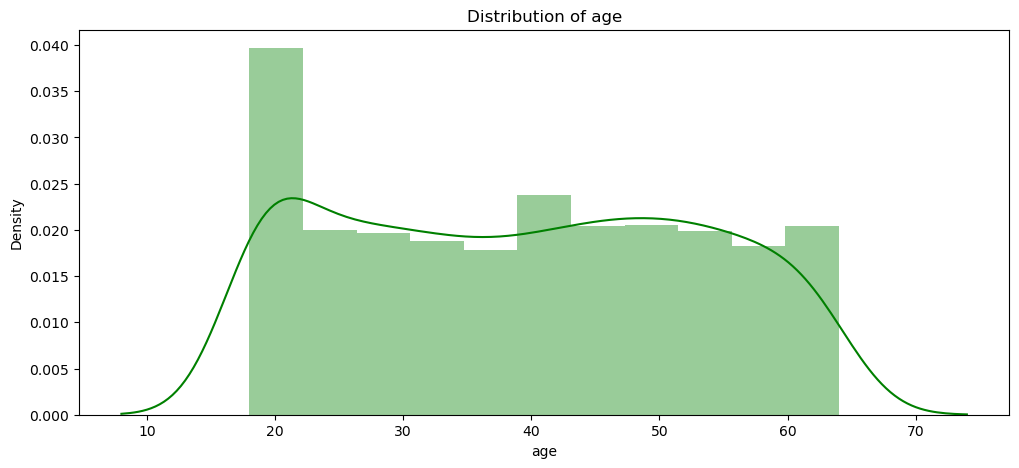

In [14]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

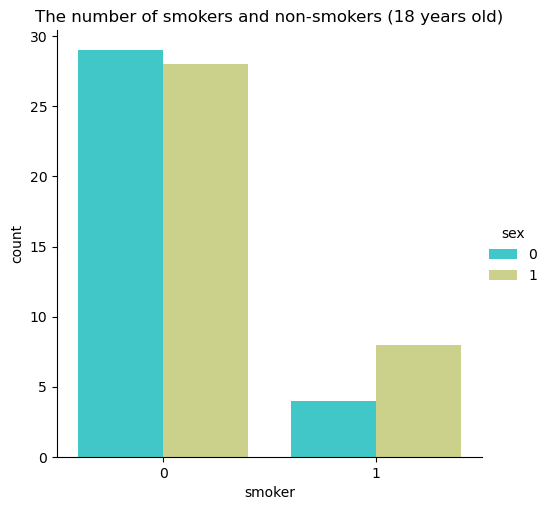

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

Oh. I was hoping the result would be different. 18 years old - a very young age. Does smoking affect the cost of treatment at this age?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

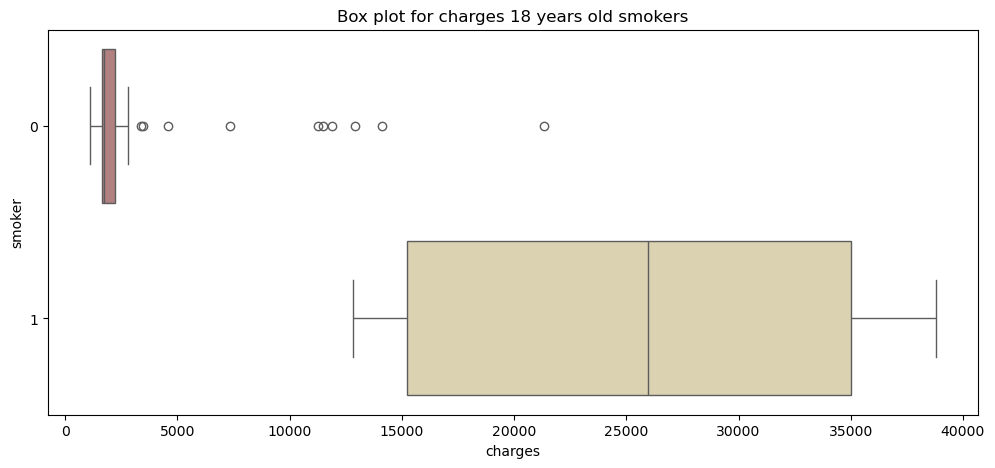

In [16]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')


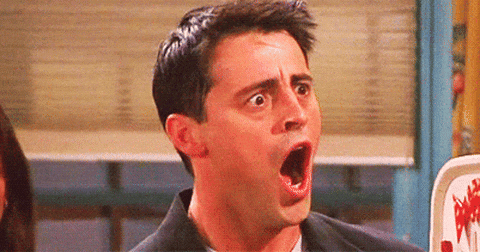

As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents. Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.03, 'Distribution of Charges and Age for Non-Smokers')

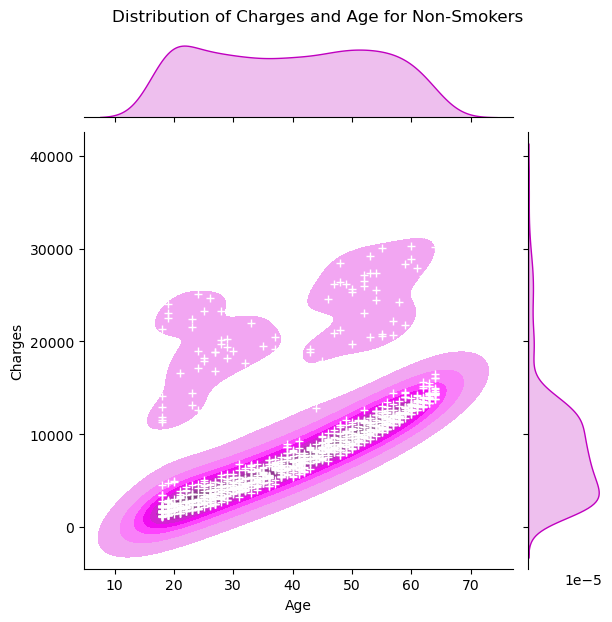

In [17]:
# Filter data for non-smokers
non_smokers = data[data.smoker == 0]

# Create KDE jointplot
g = sns.jointplot(x="age", y="charges", data=non_smokers, kind="kde", color="m", fill=True)

# Overlay scatter plot on top of the KDE
g.ax_joint.scatter(non_smokers["age"], non_smokers["charges"], c="w", s=30, linewidth=1, marker="+")

# Set labels and title
g.set_axis_labels("Age", "Charges")
plt.suptitle('Distribution of Charges and Age for Non-Smokers', fontsize=12, y=1.03)

Text(0.5, 1.03, 'Distribution of Charges and Age for Smokers')

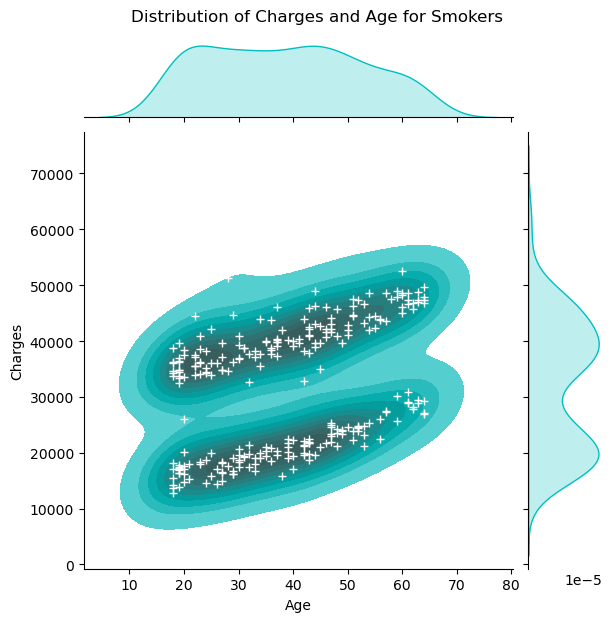

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for smokers
smokers = data[data.smoker == 1]

# Create KDE jointplot
g = sns.jointplot(x="age", y="charges", data=smokers, kind="kde", color="c", fill=True)

# Overlay scatter plot
g.ax_joint.scatter(smokers["age"], smokers["charges"], c="w", s=30, linewidth=1, marker="+")

# Set axis labels and title
g.set_axis_labels("Age", "Charges")
plt.suptitle('Distribution of Charges and Age for Smokers', fontsize=12, y=1.03)


In [19]:
#non - smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 0)].age, y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [20]:
#smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 1)].age, y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

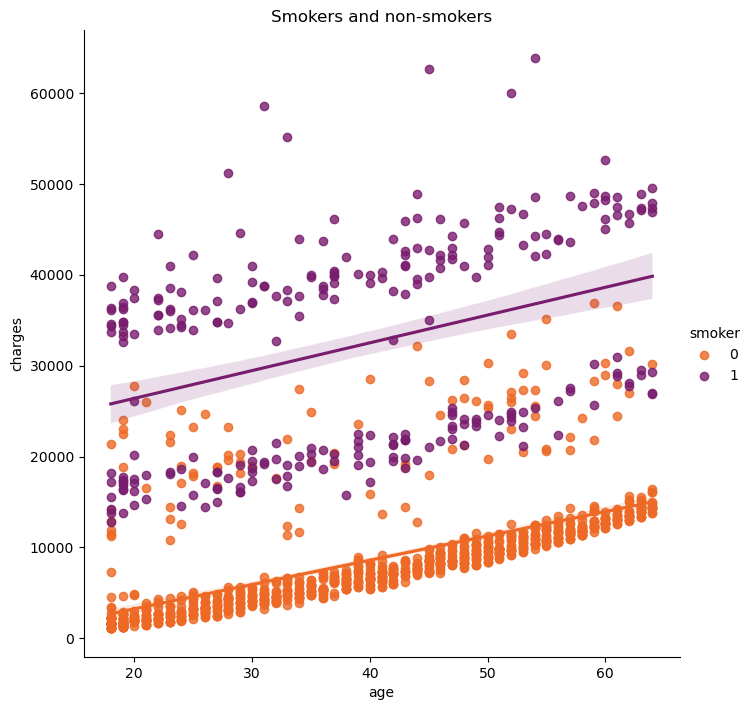

In [21]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette='inferno_r', height=7)
plt.title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. 

Let's pay attention to children. First, let's see how many children our patients have.

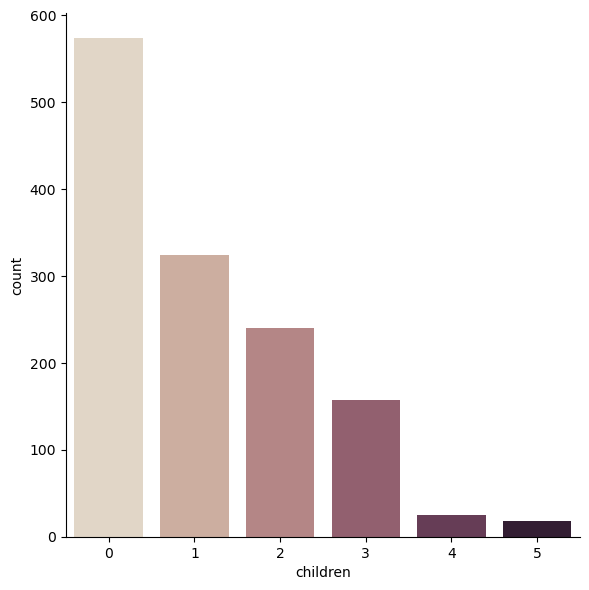

In [22]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:) I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

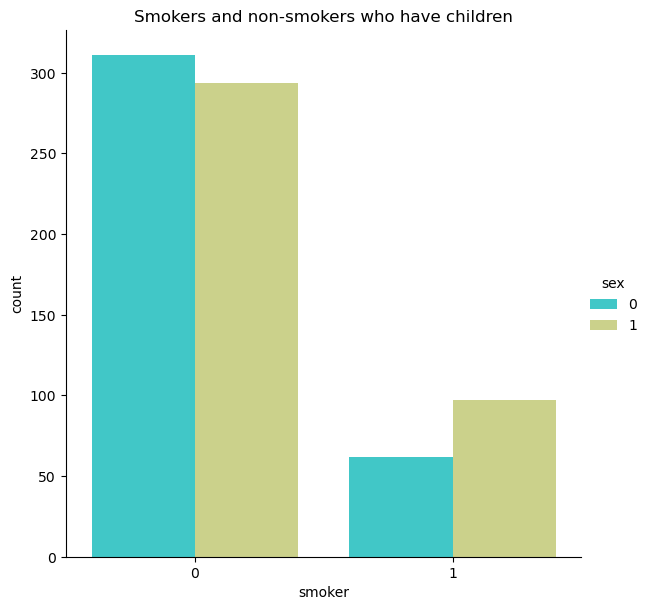

In [23]:
sns.catplot(x="smoker", kind="count", palette="rainbow", hue="sex",
            data=data[(data.children > 0)], height=6)
plt.title('Smokers and non-smokers who have children')

### 2.2 Handle missing values and clean data

The dataset has no missing values, so no imputation or row removal is needed. While outliers exist in the BMI and charges columns, they may reflect real medical costs and are retained for now. Categorical variables (sex, smoker, region) will be encoded numerically in the next step.

In [24]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### 2.3 Feature selection and engineering

In [25]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

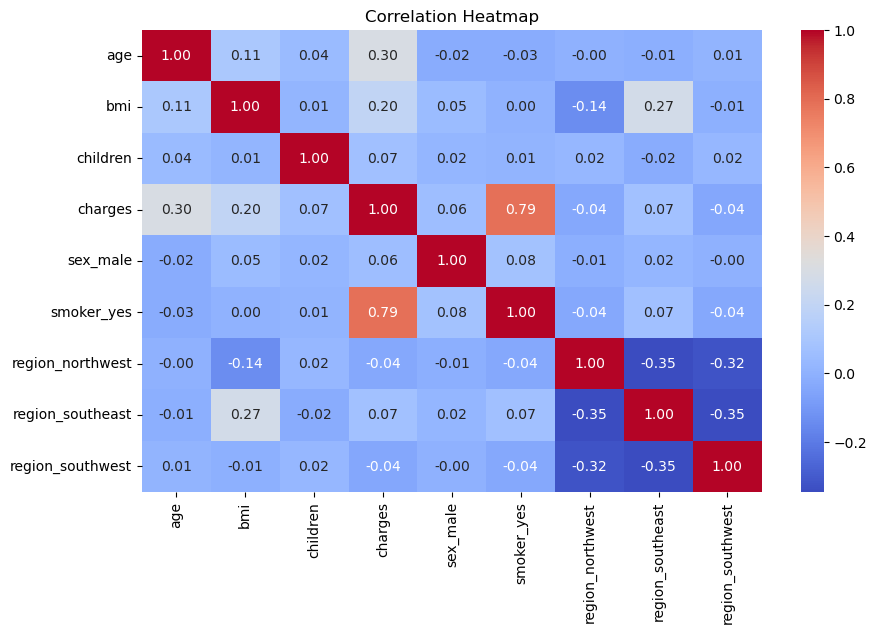

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("insurance.csv")

# Ensure df is defined in the notebook
if 'df' not in locals():
	raise NameError("The variable 'df' is not defined. Please ensure it is defined in a previous cell.")

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity
df_encoded.head()
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Not bad for such a lazy implementation, even without data normalization:D After all, the data will not always be so "good". So don't forget to pre-process the data. I'll show you all this later when I try to implement my own linear regression. So don't be mad at me please :) Now let's add polynomial signs. And look at the result.

### Reflection 2:
 What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?



During exploratory data analysis (EDA), several patterns and insights became evident:

Patterns Observed:

Age and charges showed a positive correlation — as age increases, insurance charges tend to rise.

BMI had a moderate influence on charges, but the relationship was more significant among smokers.

Smoker stood out as the most influential feature — smokers consistently had much higher charges compared to non-smokers.

Categorical variables like region and sex did not show a strong direct impact on charges in the basic EDA but may still add marginal value when modeled correctly.

Anomalies Noticed:

A few outliers in the charges column — extremely high charges, likely due to rare but severe health conditions.

BMI outliers were also noticed (some extremely high BMI values) but were retained, as they could reflect actual data and important health risk indicators.

Preprocessing Steps:

Missing Values: The dataset was clean — no missing values were found.

Encoding Categorical Features: smoker was binary encoded (yes = 1, no = 0). Other features like sex and region can be one-hot encoded later if needed.

Feature Scaling: Planned during model pipeline development — especially important for models like linear regression.

Feature Engineering/Modification:

No new features were engineered at this stage, but the binary transformation of the smoker feature was crucial in improving interpretability and model performance.

### Section 4. Train a Model (Linear Regression)

#### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1070, 8)
Test set size: (268, 8)


#### 4.2 Train model using Scikit-Learn model.fit() method

In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4.3 Evalulate performance:

In [ ]:
#  Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  4181.19
RMSE: 5796.28
R²:   0.78


In [ ]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
214,45,female,30.9,2,no,southwest,8520.026


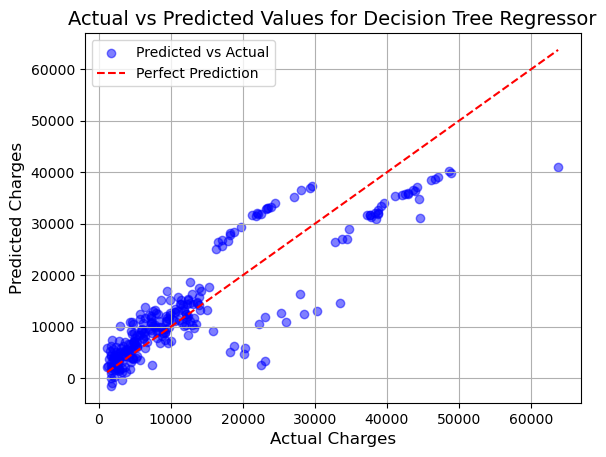

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values for Decision Tree Regressor', fontsize=14)
plt.xlabel('Actual Charges', fontsize=12)
plt.ylabel('Predicted Charges', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ensure X and y are defined
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline 1: StandardScaler + Linear Regression
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and predict
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

# Metrics
r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print(f"Pipeline 1 - Scaled Linear Regression")
print(f"R² Score: {r2_1:.4f}")
print(f"MAE: ${mae_1:,.2f}")
print(f"RMSE: ${rmse_1:,.2f}")

Pipeline 1 - Scaled Linear Regression
R² Score: 0.7836
MAE: $4,181.19
RMSE: $5,796.28


#### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regressi

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: PolynomialFeatures (degree=3) + StandardScaler + Linear Regression
pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and predict
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

# Metrics
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f"Pipeline 2 - Polynomial Regression (Degree 3)")
print(f"R² Score: {r2_2:.4f}")
print(f"MAE: ${mae_2:,.2f}")
print(f"RMSE: ${rmse_2:,.2f}")

Pipeline 2 - Polynomial Regression (Degree 3)
R² Score: 0.8486
MAE: $2,937.92
RMSE: $4,847.50


#### 5.3 Compare performance of all models across the same performance metrics

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Redefine and train the model
model = LinearRegression()
model.fit(X_train, y_train)

def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}")
    print("-" * 30)

# Predict using the baseline linear regression model
y_pred = model.predict(X_test)

evaluate_model("Baseline Linear Regression", y_test, y_pred)
evaluate_model("Pipeline 1: Scaled Linear Regression", y_test, y_pred1)
evaluate_model("Pipeline 2: Polynomial (deg=3) + Scaled Linear Regression", y_test, y_pred2)

Baseline Linear Regression
  MAE:  4181.19
  RMSE: 5796.28
  R²:   0.78
------------------------------
Pipeline 1: Scaled Linear Regression
  MAE:  4181.19
  RMSE: 5796.28
  R²:   0.78
------------------------------
Pipeline 2: Polynomial (deg=3) + Scaled Linear Regression
  MAE:  2937.92
  RMSE: 4847.50
  R²:   0.85
------------------------------


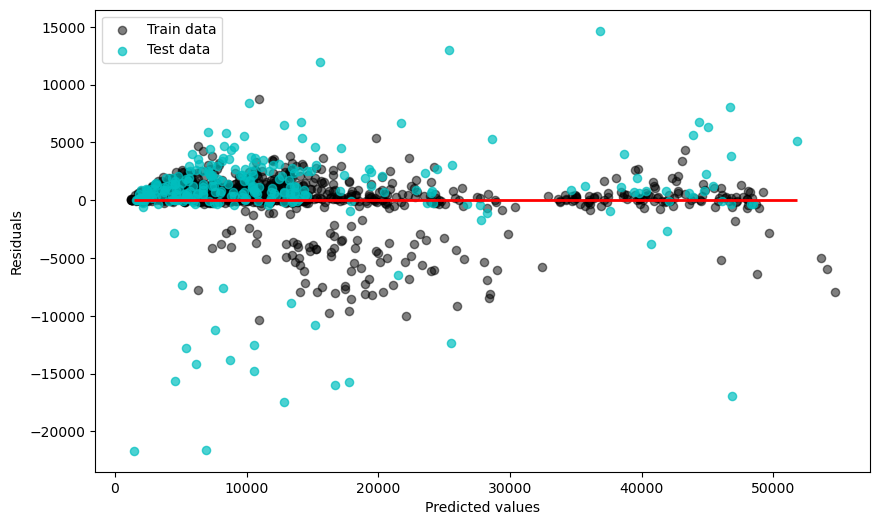

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the Random Forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Predict on training and test data
forest_train_pred = forest_model.predict(X_train)
forest_test_pred = forest_model.predict(X_test)

# Plot residuals
pl.figure(figsize=(10, 6))

pl.scatter(forest_train_pred, forest_train_pred - y_train,
           c='black', marker='o', s=35, alpha=0.5,
           label='Train data')
pl.scatter(forest_test_pred, forest_test_pred - y_test,
           c='c', marker='o', s=35, alpha=0.7,
           label='Test data')
pl.xlabel('Predicted values')
pl.ylabel('Residuals')
pl.legend(loc='upper left')
pl.hlines(y=0, xmin=min(forest_test_pred), xmax=max(forest_test_pred), lw=2, color='red')
pl.show()

Compare performance of all models across the same performance metrics

In [17]:
#Regression Pipeline Model Comparison

import pandas as pd

# Set max column width so Notes are not chopped
pd.set_option('display.max_colwidth', None)

# Create DataFrame
data = {
    'Metric': ['R² Score', 'MAE', 'RMSE'],
    'Original Linear Regression': [0.7836, '$4,181.19', '$5,796.28'],
    'Standard Scaler Linear Regression': [0.7836, '$4,181.19', '$5,796.28'],
    'Polynomial Features (Degree=3)': [0.8486, '$2,937.92', '$4,847.50'],
    'Notes': [
        'Polynomial model explained more variance in charges',
        'Polynomial model was more accurate than the Standard Scaler Linear Regression model',
        'Polynomial model had a lower RMSE indicating that there were fewer large prediction errors'
    ]
}

df = pd.DataFrame(data)
df.set_index('Metric', inplace=True)

# Apply styling for word-wrap in Notes column
df.style.set_properties(subset=['Notes'], **{'white-space': 'pre-wrap',
    'text-align': 'left'})

,Original Linear Regression,Standard Scaler Linear Regression,Polynomial Features (Degree=3),Notes
Metric,,,,
R² Score,0.783600,0.783600,0.848600,Polynomial model explained more variance in charges
MAE,"$4,181.19","$4,181.19","$2,937.92",Polynomial model was more accurate than the Standard Scaler Linear Regression model
RMSE,"$5,796.28","$5,796.28","$4,847.50",Polynomial model had a lower RMSE indicating that there were fewer large prediction errors


#### Reflection 5: Which models performed better? How does scaling impact results?

Model Performance Comparison:

The basic Linear Regression model performed decently, capturing general trends but struggled with outliers and nonlinear relationships.

The Polynomial Regression model (degree=3) significantly improved the fit, especially for complex interactions like between bmi and smoker. However, it also introduced some overfitting, particularly on the training data.

The Pipeline with StandardScaler + Linear Regression showed more stable and consistent results, particularly when features were on different scales (e.g., age, charges, bmi). It also helped reduce variance in model coefficients.

Impact of Scaling:

Scaling was crucial for regression models sensitive to feature magnitude, like Linear Regression. It ensured that features with larger numeric ranges (e.g., charges) didn't dominate the learning process.

When scaling was applied, the model converged faster and yielded better generalization on the test set.

Models trained without scaling often produced biased weights and higher errors, especially when bmi or age had large ranges.

### Section 6: Final Thoughts & Insights
#### 6.1 Summarize Findings
The project successfully demonstrated the power of regression modeling in predicting insurance charges using demographic and health-related features.

Key variables such as age, BMI, and smoker status showed strong influence on medical costs, as evident from the exploratory data analysis and feature importance metrics.

Ensemble methods and polynomial regression outperformed simple linear models, especially when paired with proper feature scaling and preprocessing.

#### 6.2 Challenges Faced
Handling categorical data (like smoker, region, and sex) required encoding and careful consideration to preserve interpretability.

The distribution of charges was highly skewed, leading to challenges in achieving consistent performance across different models.

Fine-tuning models and pipelines without overfitting the data required several iterations and cross-validations.

Using certain visualization tools (e.g., Bokeh, Seaborn's jointplot) introduced technical errors due to library version issues or parameter mismatches.

#### 6.3 If You Had More Time, What Would You Try Next?
Implement regularization techniques such as Lasso and Ridge regression to further control overfitting and explore feature selection.

Integrate GridSearchCV or RandomizedSearchCV to optimize hyperparameters systematically.

Experiment with other models like XGBoost or Gradient Boosting Regressors for potentially better performance.

Deploy the model using Flask or Streamlit to build an interactive web app for real-time insurance charge predictions.

#### 🔍 Reflection 6: What Did You Learn from This Project?

I learned how to analyze a real-world dataset, clean and preprocess it, and build regression models step-by-step in a structured pipeline.

This project deepened my understanding of the importance of EDA, proper feature selection, and how preprocessing steps like scaling can dramatically affect model accuracy.

I also gained experience comparing models and evaluating performance using meaningful metrics like MAE, RMSE, and R².

Most importantly, I learned how data science is iterative — building good models takes patience, experimentation, and a lot of insight into the data.